### Importing dataset from Roboflow

Contains images of license plate along with the character object detections

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Cy4a2I0GCjuGakbkjIrQ")
project = rf.workspace("college-fyp-ewmvi").project("final-fyp-dataset")
version = project.version(1)
dataset = version.download("yolov9")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to final-fyp-dataset-1 in yolov9:: 100%|█| 4986/4


Vieewing the project's version through Roboflow API
Model = license_detector

In [4]:
model = project.version("1").model
print(model)

{
  "id": "final-fyp-dataset/1",
  "name": "final-fyp-dataset",
  "version": "1",
  "classes": null,
  "overlap": 30,
  "confidence": 40,
  "stroke": 1,
  "labels": false,
  "format": "json",
  "base_url": "https://detect.roboflow.com/"
}


In [5]:
license_detector = project.version(1).model

Changing the confidence of the model along with the overlap

In [6]:
license_detector.confidence = 40
license_detector.overlap = 25

Testing the prediction on an image

In [10]:
prediction = license_detector.predict("/Users/sarthakshrestha/Documents/fyp ipnybs/predict.jpg")

Plotting the prediction in an interactive environment

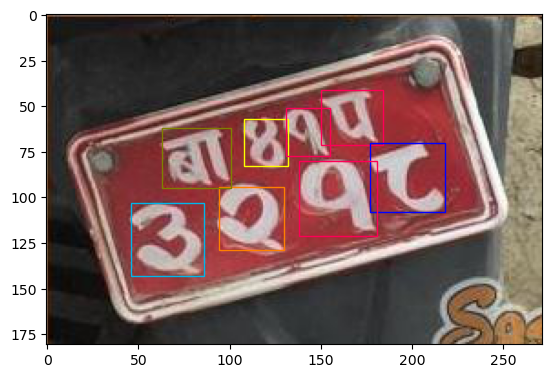

In [11]:
prediction.plot()

In [12]:
json_data = prediction.json()
print(json_data)

{'predictions': [{'x': 66.0, 'y': 123.0, 'width': 40.0, 'height': 40.0, 'confidence': 0.9550176858901978, 'class': '3', 'class_id': 3, 'detection_id': 'bfdb1e74-a469-44b3-952a-a01f40216d39', 'image_path': '/Users/sarthakshrestha/Documents/fyp ipnybs/predict.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 112.0, 'y': 111.5, 'width': 36.0, 'height': 35.0, 'confidence': 0.9522336721420288, 'class': '2', 'class_id': 2, 'detection_id': 'fedb4bd0-a80a-4a57-a546-77dbebec002d', 'image_path': '/Users/sarthakshrestha/Documents/fyp ipnybs/predict.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 82.0, 'y': 78.5, 'width': 38.0, 'height': 33.0, 'confidence': 0.9438292384147644, 'class': 'ba', 'class_id': 10, 'detection_id': '3026d21e-ffe3-4306-a914-f2b8662f9d76', 'image_path': '/Users/sarthakshrestha/Documents/fyp ipnybs/predict.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 167.0, 'y': 56.0, 'width': 34.0, 'height': 30.0, 'confidence': 0.9432401061058044, 'class': 'pa', 'cla

In [ ]:
def concatenate_classes(json_data):
    predictions = json_data['predictions']
    # We have the sort the predictions by y and then x to get the characters in the correct order
    sorted_predictions = sorted(predictions, key=lambda x: (x['y'], x['x']))
    classes = [prediction['class'] for prediction in sorted_predictions]
    
    # Separate the characters into two groups: top and bottom so that the user can read efficiently
    top_characters = classes[:4][::-1]
    bottom_characters = classes[4:][::-1]
    
    # Concatenate the characters in the desired order
    concatenated_classes = ', '.join(top_characters) + '\n' + ', '.join(bottom_characters)
    return concatenated_classes 

print(concatenate_classes(json_data))


ba, 4, 1, pa
3, 2, 1, 8


Printing out all the classes that could be contained in an image

In [ ]:
# Printing out the classes

project_classes = project.classes
for values in project_classes:
    print(values)

# Printing out the number of classes that the model can detect
print("The model contains", len(project_classes), "classes")

0
1
2
3
4
5
6
7
8
9
lu
ka
bagmati
me
ga
cha
gha
jha
ko
kha
madesh
ra
pa
na
ja
pradesh
ba
license-plate
The model contains 28 classes


In [ ]:
prediction1 = license_detector.predict("predict1.png")

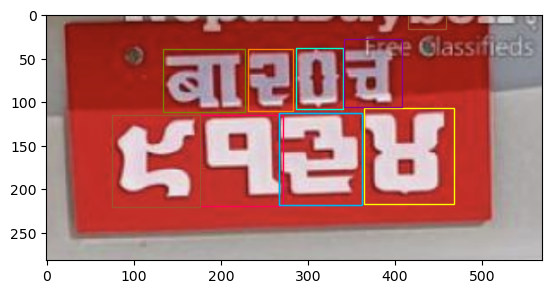

In [ ]:
prediction1.plot()

In [ ]:
prediction1json = prediction1.json()
def read_classes(prediction1json):

  predictions = prediction1json['predictions']

  # Sort predictions based on y-coordinate (height) first, then x-coordinate (left-to-right)
  sorted_predictions = sorted(predictions, key=lambda x: (x['y'], x['x']))

  # Split the characters into two rows
  classes = [prediction['class'] for prediction in sorted_predictions]
  row1 = classes[:4]
  row2 = classes[4:]

  # Sort each row based on the first character (assuming all digits are left-aligned)
  def sort_by_first_char(text):
    try:
      return int(text[0])
    except ValueError:
      # Handle non-numeric characters (place them after digits)
      return 100

  row1 = sorted(row1, key=sort_by_first_char)
  row2 = sorted(row2, key=sort_by_first_char)

  # Concatenate the characters in the desired order
  concatenated_classes = ', '.join(row1) + '\n' + ', '.join(row2)
  return concatenated_classes

print(concatenate_classes(prediction1json))



2, 0, cha, 9
9, 1, 3, 6, 4, ba


In [ ]:
prediction1json

{'predictions': [{'x': 180.5,
   'y': 75.0,
   'width': 95.0,
   'height': 72.0,
   'confidence': 0.944726824760437,
   'class': 'ba',
   'class_id': 10,
   'detection_id': 'eef767ed-0b6e-4780-be03-3aa1b6256afa',
   'image_path': 'predict1.png',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 223.5,
   'y': 167.0,
   'width': 95.0,
   'height': 104.0,
   'confidence': 0.936123251914978,
   'class': '1',
   'class_id': 1,
   'detection_id': 'a502c050-fa2e-44db-b3d3-555f3633419e',
   'image_path': 'predict1.png',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 313.0,
   'y': 72.5,
   'width': 54.0,
   'height': 71.0,
   'confidence': 0.9347714185714722,
   'class': '0',
   'class_id': 0,
   'detection_id': 'af47ce8b-ec1e-4f9e-a08e-199afe2f9c34',
   'image_path': 'predict1.png',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 257.0,
   'y': 74.5,
   'width': 52.0,
   'height': 71.0,
   'confidence': 0.9296677708625793,
   'class': '2',
   'class_id': 2,
   'detection_

In [ ]:
def concat_row(prediction1json):
    predictions = prediction1json['predictions']
    
    # Sort predictions based on y-coordinate (height) first, then x-coordinate (left-to-right)
    sorted_predictions = sorted(predictions, key=lambda x: (x['y'], x['x']))
    
    # Collect classes
    classes = [prediction['class'] for prediction in sorted_predictions]
    
    # Calculate the number of columns (assuming characters are aligned vertically)
    num_columns = len(set(prediction['x'] for prediction in sorted_predictions))
    
    # Initialize concatenated string
    concatenated_classes = ''
    
    # Loop through rows and columns to concatenate classes
    for i in range(0, len(classes), num_columns):
        row_classes = classes[i:i+num_columns]
        concatenated_classes += ', '.join(row_classes) + '\n'
    
    return concatenated_classes.strip()

print(concat_row(prediction1json))



9, cha, 0, 2, ba, 4, 6, 3, 1
9


### Testing prediction on a different image and cropping out the detected portions

In [14]:
prediction = license_detector.predict("/Users/sarthakshrestha/Documents/fyp ipnybs/test.png")

In [25]:
print(prediction)

{
  "x": 255.5,
  "y": 311.5,
  "width": 241.0,
  "height": 59.0,
  "confidence": 0.6617579460144043,
  "class": "license-plate",
  "class_id": 20,
  "detection_id": "fd5e25b1-6cc6-4198-bbca-113a272c6342",
  "image_path": "/Users/sarthakshrestha/Documents/fyp ipnybs/test.png",
  "prediction_type": "ObjectDetectionModel"
}




In [16]:
predictionjson = prediction.json()

In [17]:
print(predictionjson)

{'predictions': [{'x': 255.5, 'y': 311.5, 'width': 241.0, 'height': 59.0, 'confidence': 0.6617579460144043, 'class': 'license-plate', 'class_id': 20, 'detection_id': 'fd5e25b1-6cc6-4198-bbca-113a272c6342', 'image_path': '/Users/sarthakshrestha/Documents/fyp ipnybs/test.png', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '717', 'height': '410'}}


In [30]:
import cv2
import matplotlib.pyplot as plt
image_path = "/Users/sarthakshrestha/Documents/fyp ipnybs/test.png"
prediction_json = predictionjson

def show_roi_from_json(image_path, prediction_json):
    # Load the image
    image = cv2.imread(image_path)

    # Get the bounding box coordinates from the prediction
    bounding_box = prediction_json['predictions'][0]
    x = bounding_box['x']
    y = bounding_box['y']
    width = bounding_box['width']
    height = bounding_box['height']

    # Calculate the coordinates of the region of interest
    x1 = int(x - width / 2)
    y1 = int(y - height / 2)
    x2 = int(x + width / 2)
    y2 = int(y + height / 2)

    # Crop the region of interest from the image
    roi = image[y1:y2, x1:x2]

    # Showing the cropped region of interest
    plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Turn off axes
    plt.show()
    plt.savefig('/Users/sarthakshrestha/Documents/fyp ipnybs/prediction1.png')

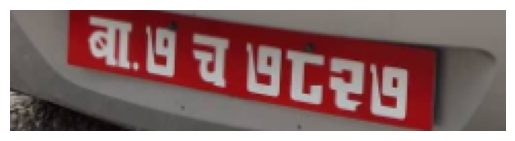

<Figure size 640x480 with 0 Axes>

In [31]:
show_roi_from_json(image_path, prediction_json)

### Trying to run the prediction again on the newly detected licnse plate model so the characters are read

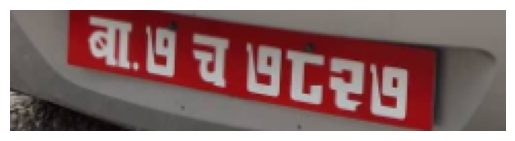

In [35]:
import cv2
import matplotlib.pyplot as plt

image_path = "/Users/sarthakshrestha/Documents/fyp ipnybs/test.png"
prediction_json = predictionjson

def show_roi_from_json(image_path, prediction_json):
    # Load the image
    image = cv2.imread(image_path)

    # Get the bounding box coordinates from the prediction
    bounding_box = prediction_json['predictions'][0]
    x = bounding_box['x']
    y = bounding_box['y']
    width = bounding_box['width']
    height = bounding_box['height']

    # Calculate the coordinates of the region of interest
    x1 = int(x - width / 2)
    y1 = int(y - height / 2)
    x2 = int(x + width / 2)
    y2 = int(y + height / 2)

    # Crop the region of interest from the image
    roi = image[y1:y2, x1:x2]

    # Save the cropped region of interest
    cv2.imwrite('/Users/sarthakshrestha/Documents/fyp ipnybs/prediction1.png', roi)

    # Showing the cropped region of interest
    plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Turn off axes
    plt.savefig('/Users/sarthakshrestha/Documents/fyp ipnybs/prediction2.png')
    plt.show()

show_roi_from_json(image_path, prediction_json)


In [36]:
prediction_from_boundary_box = license_detector.predict("/Users/sarthakshrestha/Documents/fyp ipnybs/prediction1.png")

In [37]:
print(prediction_from_boundary_box)

{
  "x": 144.0,
  "y": 32.5,
  "width": 20.0,
  "height": 27.0,
  "confidence": 0.9678257703781128,
  "class": "8",
  "class_id": 8,
  "detection_id": "8fad2aea-2ac5-4186-b65f-2a0f87cb4670",
  "image_path": "/Users/sarthakshrestha/Documents/fyp ipnybs/prediction1.png",
  "prediction_type": "ObjectDetectionModel"
}

{
  "x": 48.0,
  "y": 16.5,
  "width": 24.0,
  "height": 29.0,
  "confidence": 0.9482974410057068,
  "class": "ba",
  "class_id": 10,
  "detection_id": "2aebb2bd-e7d0-4b11-93c4-33c5362a2760",
  "image_path": "/Users/sarthakshrestha/Documents/fyp ipnybs/prediction1.png",
  "prediction_type": "ObjectDetectionModel"
}

{
  "x": 185.0,
  "y": 40.0,
  "width": 22.0,
  "height": 30.0,
  "confidence": 0.9095046520233154,
  "class": "7",
  "class_id": 7,
  "detection_id": "aef5175f-115a-4823-9d8f-4fbdba057904",
  "image_path": "/Users/sarthakshrestha/Documents/fyp ipnybs/prediction1.png",
  "prediction_type": "ObjectDetectionModel"
}

{
  "x": 163.5,
  "y": 36.5,
  "width": 19.0,
  

In [39]:
boundaryjson = prediction_from_boundary_box.json()
print(boundaryjson)

{'predictions': [{'x': 144.0, 'y': 32.5, 'width': 20.0, 'height': 27.0, 'confidence': 0.9678257703781128, 'class': '8', 'class_id': 8, 'detection_id': '8fad2aea-2ac5-4186-b65f-2a0f87cb4670', 'image_path': '/Users/sarthakshrestha/Documents/fyp ipnybs/prediction1.png', 'prediction_type': 'ObjectDetectionModel'}, {'x': 48.0, 'y': 16.5, 'width': 24.0, 'height': 29.0, 'confidence': 0.9482974410057068, 'class': 'ba', 'class_id': 10, 'detection_id': '2aebb2bd-e7d0-4b11-93c4-33c5362a2760', 'image_path': '/Users/sarthakshrestha/Documents/fyp ipnybs/prediction1.png', 'prediction_type': 'ObjectDetectionModel'}, {'x': 185.0, 'y': 40.0, 'width': 22.0, 'height': 30.0, 'confidence': 0.9095046520233154, 'class': '7', 'class_id': 7, 'detection_id': 'aef5175f-115a-4823-9d8f-4fbdba057904', 'image_path': '/Users/sarthakshrestha/Documents/fyp ipnybs/prediction1.png', 'prediction_type': 'ObjectDetectionModel'}, {'x': 163.5, 'y': 36.5, 'width': 19.0, 'height': 27.0, 'confidence': 0.8758472800254822, 'class':

In [40]:
def concat_row(test_predictions):
    predictions = test_predictions['predictions']
    
    # Sort predictions based on y-coordinate (height) first, then x-coordinate (left-to-right)
    sorted_predictions = sorted(predictions, key=lambda x: (x['y'], x['x']))
    
    # Collect classes
    classes = [prediction['class'] for prediction in sorted_predictions]
    
    # Calculate the number of columns (assuming characters are aligned vertically)
    num_columns = len(set(prediction['x'] for prediction in sorted_predictions))
    
    # Initialize concatenated string
    concatenated_classes = ''
    
    # Loop through rows and columns to concatenate classes
    for i in range(0, len(classes), num_columns):
        row_classes = classes[i:i+num_columns]
        concatenated_classes += ', '.join(row_classes) + '\n'
    
    return concatenated_classes.strip()


In [41]:
concat_row(boundaryjson)

'ba, 7, cha, 7, 8, 2, 7'